# Activity 4: Extracting data from Twitter

Extract 100 tweets using tweepy library having hashtag '#WorldWaterDay' and do the following <br>
i) Filter out the ones which are written in english <br>
ii) Calculate sentiment score for each of them using textblob library <br>
iii) Visualize these tweets using word cloud having at most 100 words <br>

In [3]:
#!pip install tweepy

Login to twitter <br>
Go to https://developer.twitter.com/en/apps <br>
Create an app <br>
Once app is created, Go to 'Keys and tokens' tab; copy consumer_key, consumer_secret, access_token, access_token_secret from there  <br>

In [1]:
consumer_key = 'your consumer key here'
consumer_secret = 'your consumer secret key here'
access_token = 'your access token here'
access_token_secret = 'your access token secret here'

In [2]:
import pandas as pd
import numpy as np
import pickle
import json
from pprint import pprint
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
tweet_list = []
cnt = 0
for tweet in tweepy.Cursor(api.search, q='#WorldWaterDay', rpp=100).items():
    tweet_list.append(tweet)
    cnt = cnt + 1
    if cnt == 100:
        break

In [5]:
len(tweet_list)

100

In [6]:
tweet_list[0]

Status(_api=<tweepy.api.API object at 0x1a21e67c18>, _json={'created_at': 'Sat Mar 23 19:11:49 +0000 2019', 'id': 1109533225255358464, 'id_str': '1109533225255358464', 'text': 'RT @unisdr: Agriculture accounts for 70% of global water withdrawals, mostly for irrigation. Industry takes 20% of the total, dominated by…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'unisdr', 'name': 'UNISDR', 'id': 62780688, 'id_str': '62780688', 'indices': [3, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2837214585, 'id_str': '2837214585', 'name': 'DRR Kenya', 'screen_name': 'DRRKenya', 'location': '', 'description': '', 'url': None, 'entities'

In [8]:
status = tweet_list[0]
json_str = json.dumps(status._json)
pprint(json.loads(json_str))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Mar 23 19:11:49 +0000 2019',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 62780688,
                                 'id_str': '62780688',
                                 'indices': [3, 10],
                                 'name': 'UNISDR',
                                 'screen_name': 'unisdr'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1109533225255358464,
 'id_str': '1109533225255358464',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 16,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
            

In [9]:
json.loads(json_str)['text']

'RT @unisdr: Agriculture accounts for 70% of global water withdrawals, mostly for irrigation. Industry takes 20% of the total, dominated by…'

In [10]:
tweet_text = []
for i in range(0,len(tweet_list)):
    status = tweet_list[i]
    json_str = json.dumps(status._json)
    tweet_text.append(json.loads(json_str)['text'])

In [11]:
unique_tweet_text = list(set(tweet_text))

## Creating dataframe consists of texts of tweets

In [12]:
tweet_text_df = pd.DataFrame({'tweet_text' : unique_tweet_text})
tweet_text_df.head()

,tweet_text
0,RT @Alfreddezayas: Safe water means safely man...
1,"RT @Rotary: In Ghana, #Rotary clubs and @USAID..."
2,RT @France24_en: Today is UN #WorldWaterDay 🌍!...
3,RT @ChinaDaily: The government aims to achieve...
4,RT @AgenciaAJN: #WorldWaterDay Israel recycle...


In [13]:
tweet_text_df['language_detected'] = tweet_text_df['tweet_text'].apply(lambda x : \
                                                                       str(TextBlob('u'+str(x)).detect_language()))

In [14]:
tweet_text_df.head(20)

,tweet_text,language_detected
0,RT @Alfreddezayas: Safe water means safely man...,en
1,"RT @Rotary: In Ghana, #Rotary clubs and @USAID...",en
2,RT @France24_en: Today is UN #WorldWaterDay 🌍!...,en
3,RT @ChinaDaily: The government aims to achieve...,en
4,RT @AgenciaAJN: #WorldWaterDay Israel recycle...,en
5,RT @JemilahMahmood: #WorldWaterDay reminds us ...,en
6,RT @OurRevolution: On #WorldWaterDay we stand ...,en
7,World Water Day takes place every year and aim...,en
8,"RT @Pontifex: Let us thank God for ""sister wat...",en
9,RT @AiyshwaryaM: .@MBPatil was not only instru...,en


## Non-english tweets

In [15]:
tweet_text_df[tweet_text_df['language_detected']!='en']

,tweet_text,language_detected
10,RT @Pontifex_it: Ringraziamo Dio per “sorella ...,it
26,RT @TRTBelgesel: Türk sivil toplum kuruluşları...,tr
30,RT @CellerRocaBBVA: 💧 En el #DíaMundialdelAgua...,es
52,RT @domainechambord: L'eau est une ressource p...,fr
69,RT @funcagua: Hoy es un buen día para reflexio...,es
76,"RT @Pontifex_pt: Agradeçamos a Deus pela ""irmã...",pt


## Filter out the english tweets

In [16]:
tweet_text_df_eng = tweet_text_df[tweet_text_df['language_detected']=='en']
tweet_text_df_eng.shape

(75, 2)

## Extract sentiment scores of the english tweets using textblob

In [17]:
tweet_text_df_eng['sentiment_score'] = tweet_text_df_eng['tweet_text'].apply(lambda x: str(TextBlob('u'+str(x)).sentiment.polarity))
pd.set_option('display.max_colwidth', -1)
tweet_text_df_eng[['tweet_text', 'sentiment_score']].head(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_text,sentiment_score
0,RT @Alfreddezayas: Safe water means safely managed drinking water services: water that is accessible locally and available when needed #Wor…,0.355
1,"RT @Rotary: In Ghana, #Rotary clubs and @USAID are working together to implement more than 200 sustainable programs by 2020 that will bring…",0.5
2,"RT @France24_en: Today is UN #WorldWaterDay 🌍! According to the UN, 2.1 billion people do not have access to drinking water at home. Every…",0.0
3,RT @ChinaDaily: The government aims to achieve a balance between usage and replenishment of underground water in the Beijing-Tianjin-Hebei…,0.0
4,RT @AgenciaAJN: #WorldWaterDay Israel recycles and decontaminates rainwater before feeding the groundwater https://t.co/P2arxHEmmP https:/…,0.0
5,RT @JemilahMahmood: #WorldWaterDay reminds us how access to H20/sanitation are basic rights. @ifrc to champion #OneWASH with partners to re…,0.0
6,"RT @OurRevolution: On #WorldWaterDay we stand in solidarity with residents of Flint, Michigan and communities across the United States who…",0.0
7,World Water Day takes place every year and aims to underline the importance of water. There is a lack of clean wate… https://t.co/2rw9DguOY9,0.3666666666666667
8,"RT @Pontifex: Let us thank God for ""sister water"", such a simple and precious element, and let us strive to make it accessible to all. #Wor…",0.21875
9,RT @AiyshwaryaM: .@MBPatil was not only instrumental in our fight for Kaveri but also implemented an unprecedented amount of development in…,0.3


## Creating word cloud

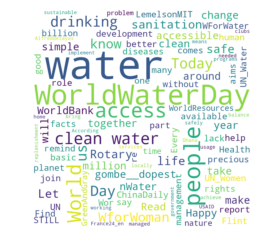

In [20]:
other_stopwords_to_remove = ['https', 'amp','co', 'rt']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text=tweet_text_df_eng["tweet_text"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()